## 15.5 Homework

- Write a code to solve the minimum of 2D function with Monte Carlo method
- Write a code to solve the minimum of 2D function using the gradient decent method with variable step size by following the [wikipedia page](https://en.wikipedia.org/wiki/Gradient_descent)


In [1]:
"""
Erick Serrano
HW15
"""

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #3D plots

As we can see, the minimum seems to be at the point (0,0), which yields 0. Let us test this with the Monte Carlo Method

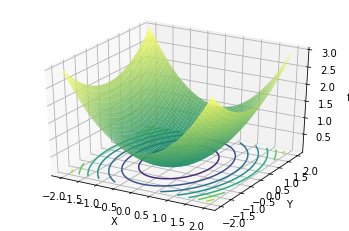

In [2]:
a = -2
b = 2
points = 100

#2-D Function
#Taken from Lecture 15 formula
def f(dims):
    z = 1/2*dims[0]**2 + 1/4*dims[1]**2
    #print(z)
    #print(1/2*dims[0]**2)
    #print(1/4*dims[1]**2)
    
    
    return 1/2*dims[0]**2 + 1/4*dims[1]**2
#Graph
nx = np.linspace(a,b,points)
ny = np.linspace(a,b,points)

x,y = np.meshgrid(nx,ny)

z = f([x,y])
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x,y,z, cmap='summer', alpha=.9)
cset = ax.contour(x,y,z, zdir='z', offset=0)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f')

plt.show()

In [3]:
"""
Write a code to solve the minimum of a 2D function with the
MonteCarlo Method


If we are using the monte carlo method, than we are using
random numbers in a given domain/range to find the minimum of
a function. 
"""

#m-dimensional monte carlo method for a function
def MC(N, dimension_size, bound_list, f):
    """
    Parameters:
    N - Number of iterations/plots to be used
    dimensions - Number of dimensions for the problem
                (x,y,z, etc...)
    bound_list - bounds for each dimension (domain, range, etc...)
    f - function to compare to
    """
    l = np.random.uniform(bound_list[0,0], bound_list[0,1], (dimension_size))
    l = l.reshape((l.shape[0],1))
    print("# Of Dimensions:",dimension_size)
    
    dims = l
    print("Starting point", dims)
    
    lowest_point = f(dims)
    lowest_dims = dims
        
    for i in range(N-1):
        dims = np.random.uniform(bound_list[0,0], bound_list[0,1], (dimension_size))
        dims.reshape(dims.shape[0],1)
        if lowest_point > f(dims):
            lowest_point = f(dims)
            lowest_dims = dims
            print("New low point: ", lowest_point)
            print("Associated dim values: ", lowest_dims, "\n\n")
    
    return lowest_point, lowest_dims






In [4]:
#Constructing Dimensions and bounds for x and y
x_bound = [-2,2]
y_bound = [-2,2]

dims = 2 #X and Y

bounds = np.array(([x_bound,y_bound]))

N = 10000000


min_z, min_vals = MC(N, dims, bounds, f)

# Of Dimensions: 2
Starting point [[-1.19030578]
 [-1.74244522]]
New low point:  0.07506929153457358
Associated dim values:  [ 0.042552  -0.5446612] 


New low point:  0.025389342672514987
Associated dim values:  [-0.22205261 -0.0542462 ] 


New low point:  0.008111026319939332
Associated dim values:  [ 0.12475478 -0.03628493] 


New low point:  0.0071238983898706185
Associated dim values:  [-0.09279075  0.10618543] 


New low point:  0.0002987881368376508
Associated dim values:  [-0.02430864 -0.00365142] 


New low point:  0.00010088842804020843
Associated dim values:  [ 0.00458357 -0.01901409] 


New low point:  4.251350290188341e-05
Associated dim values:  [-0.00301795  0.01232225] 


New low point:  2.9536098195035964e-06
Associated dim values:  [0.00067237 0.00330307] 


New low point:  2.348876576234248e-06
Associated dim values:  [-0.00045307  0.00299749] 


New low point:  6.607281399633316e-07
Associated dim values:  [-0.00032044  0.00156127] 


New low point:  3.9663990112275

In [48]:
"""
Write a code to solve the minimum of 2D function using 
the gradient descent method with variable step size method
"""

alpha = [0.01, .1, .0001, 1]

N = 100000

x = np.random.uniform(-2, 2, 1)
y = np.random.uniform(-2, 2, 1)

print(x.shape)

def f(x=0, y=0):
    return 1/2*x**2+ 1/4*y**2
def fx(x):
    return 1/2*x**2
def fy(y):
    return 1/4*y**2

def derivative(f,x, dx=0.1):
    return (f(x+dx)-f(x))/dx


(1,)


In [49]:
def gradient_descent(N, alpha, x, y):

    """
    N - num of iterations
    alpha - step size
    x - xvalue initial
    y - yvalue initial
    """
    prev_x = x
    prev_y = y
    
    for i in range(N):
        dx = derivative(fx, prev_x, alpha)
        dy = derivative(fy, prev_y, alpha)
        
        newx = prev_x - alpha*dx
        newy = prev_y - alpha*dy
        
        prev_y = newy
        prev_x =  newx
        
        if(i % 50000 == 0):
            print("Iteration ", i)
        
    print("Gradient Descent done!")
    return newx,newy
    

In [50]:
grad_values = []
for val in alpha:
    grad_values.append(gradient_descent(N, val, x, y))
   

for grad in grad_values:
    print("Results: ", grad)
    

Iteration  0
Iteration  50000
Gradient Descent done!
Iteration  0
Iteration  50000
Gradient Descent done!
Iteration  0
Iteration  50000
Gradient Descent done!
Iteration  0
Iteration  50000
Gradient Descent done!
Results:  (array([-0.005]), array([-0.005]))
Results:  (array([-0.05]), array([-0.05]))
Results:  (array([-0.0001362]), array([0.0069495]))
Results:  (array([-0.5]), array([-0.5]))


In [51]:
print("Smallest x and y values are:", grad_values[2][0], grad_values[2][1])
print("This yields: ", f(grad_values[2][0][0], grad_values[2][1][0]))

Smallest x and y values are: [-0.0001362] [0.0069495]
This yields:  1.2083167694725977e-05


# Conclusion
A small  $\gamma$ value will be more precise and reach values closer to what we desire when it comes to gradient descent. In Monte Carlo, it is unknown how long it can take to reach a desired value. 